In [65]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
iris_data = pd.read_csv("./iris-data.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


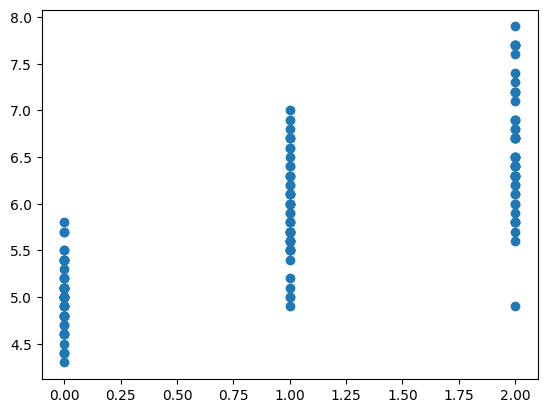

In [82]:
plt.scatter(iris_data['species'], iris_data['sepal_length'])
plt.show()

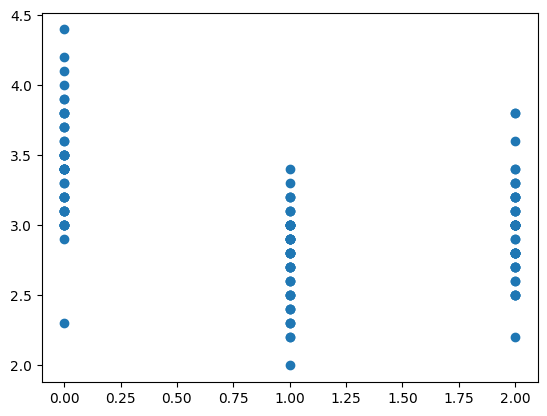

In [83]:
plt.scatter(iris_data['species'], iris_data['sepal_width'])
plt.show()

In [67]:
iris_data["species"].replace({"setosa": 0, "versicolor": 1 , "virginica" : 2}, inplace=True)

In [68]:
val = iris_data.values

props = val[: , 0:4]
train_labels = val[: , 4]

train = []
 
for i in props:
    value = i.reshape(2,2)
    train.append(value)

train = np.array(train)




In [69]:
labels = ['setosa' , 'versicolor' , 'virginica']

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,2)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [72]:
fit = model.fit(train, train_labels, epochs=250)

Epoch 1/250
5/5 [==============================] - 0s 3ms/step - loss: 1.1033 - accuracy: 0.5067
Epoch 2/250
5/5 [==============================] - 0s 3ms/step - loss: 0.9288 - accuracy: 0.6600
Epoch 3/250
5/5 [==============================] - 0s 4ms/step - loss: 0.8816 - accuracy: 0.5733
Epoch 4/250
5/5 [==============================] - 0s 3ms/step - loss: 0.8314 - accuracy: 0.7467
Epoch 5/250
5/5 [==============================] - 0s 4ms/step - loss: 0.7689 - accuracy: 0.6667
Epoch 6/250
5/5 [==============================] - 0s 3ms/step - loss: 0.7279 - accuracy: 0.6933
Epoch 7/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.8200
Epoch 8/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.7667
Epoch 9/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.7267
Epoch 10/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.7867
Epoch 11/250
5/5 [===========

5/5 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.9800
Epoch 168/250
5/5 [==============================] - 0s 5ms/step - loss: 0.0835 - accuracy: 0.9867
Epoch 169/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9733
Epoch 170/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9733
Epoch 171/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9733
Epoch 172/250
5/5 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9733
Epoch 173/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9733
Epoch 174/250
5/5 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9733
Epoch 175/250
5/5 [==============================] - 0s 4ms/step - loss: 0.0809 - accuracy: 0.9867
Epoch 176/250
5/5 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9800
Epoch 177/250
5/5 [=====

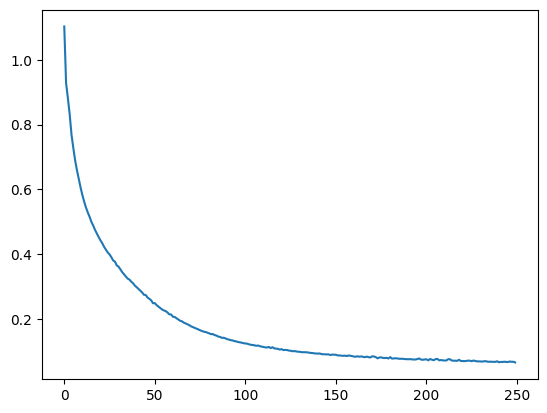

In [73]:
plt.plot(fit.history['loss'], label='loss')
plt.show()

In [74]:
test_loss, test_acc = model.evaluate(train,  train_labels, verbose=2)
print(f"Presición del {test_acc * 100}%")

5/5 - 0s - loss: 0.0653 - accuracy: 0.9733 - 109ms/epoch - 22ms/step
Presición del 97.33333587646484%


In [75]:
new_items = []

fil2 = [[4.3,6.2,3.2,0.4],[7.2,4.1,6.2,0.2],[7.3,6.2,1.5,2],[6.5,4.2,5.5,1.7]]

for item in fil2:
  step = np.array(item).reshape([2,2])
  new_items.append(step)

test = np.array(new_items)

In [76]:
predictions = model.predict(test)

In [77]:
results = []

for i in predictions:
    result = np.argmax(i)
    nombre = labels[result]
    results.append(nombre)

print(f"Los resultados son: {results}")

Los resultados son: ['setosa', 'versicolor', 'setosa', 'versicolor']
